In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as patches
import seaborn as sns
from utils import plot_region_2D

### Theory Space

In [13]:
N = 10_000
circle_center = np.array([-5, -5])
circle_radius = 1.5

# SMALL CIRCLE
circle_radii = circle_radius * np.sqrt(np.random.uniform(0, 1, N))
angles = np.random.uniform(0, 2*np.pi, N)
circle_x = circle_center[0] + circle_radii * np.cos(angles)
circle_y = circle_center[1] + circle_radii * np.sin(angles)

# CROWN COVERING ~3/4 OF CIRCLE
crown_inner_radius = circle_radius + 1
crown_outer_radius = circle_radius + 2.8
crown_angles = []
while len(crown_angles) < N:
    angle = np.random.uniform(-3*np.pi/4, 5*np.pi/4)
    if not (-np.pi/4 <= angle <= np.pi/1.5):
        crown_angles.append(angle)
crown_angles = np.array(crown_angles)
crown_radii = np.sqrt(np.random.uniform(0, 1, N) * (crown_outer_radius**2 - crown_inner_radius**2) + crown_inner_radius**2)
crown_x = circle_center[0] + crown_radii * np.cos(crown_angles)
crown_y = circle_center[1] + crown_radii * np.sin(crown_angles)

theta_samples = np.hstack((
    np.concatenate((circle_x, crown_x)).reshape(-1, 1),
    np.concatenate((circle_y, crown_y)).reshape(-1, 1),
))

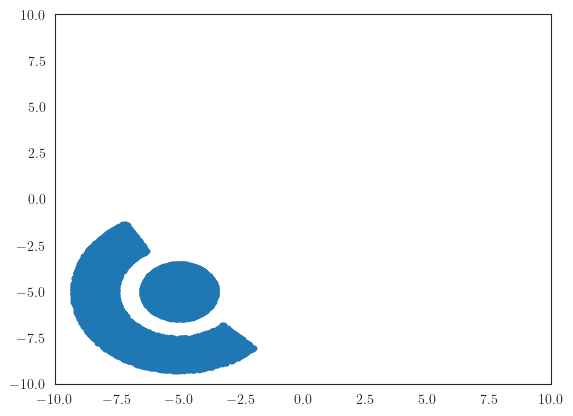

In [14]:
plt.scatter(theta_samples[:, 0], theta_samples[:, 1], s=10)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

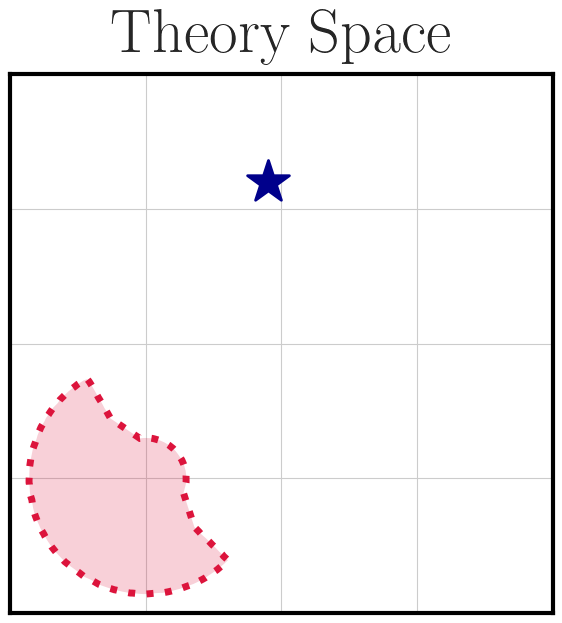

In [ ]:
sns.set_style('whitegrid')

plt.rc('text', usetex=True)  # Enable LaTeX
plt.rc('font', family='serif')  # Use a serif font (e.g., Computer Modern)
plt.rcParams['text.latex.preamble'] = r'''
    \usepackage{amsmath}  % For \mathbb
    \usepackage{amssymb}  % For \mathbb
    \usepackage{bm}       % For bold math symbols
    \usepackage{underscore} % If underscores are needed
'''

plot_region_2D(
    region_points=theta_samples,
    truth=np.array([-0.5, 6]),
    color='crimson',
    alpha=1,  # using a lower-than-necessary alpha to have a single region
    parameter_space_bounds={r'$\theta_1$': {'low': -10, 'high': 10}, r'$\theta_2$': {'low': -10, 'high': 10}},
    labels=[r'$\theta_1$', r'$\theta_2$'],
    truth_color='darkblue',
    truth_marker='*',
    linestyle=':',
    title='Theory Space',
    figsize=(7, 7),
    save_fig_path='./outputs/dgp_theory.pdf'
)

sns.set_style('white')

### Data Space

In [17]:
N = 10_000
angles = np.random.uniform(0, 2*np.pi, N)

# CIRCLE 1
circle1_center = np.array([0.5, 3.5])
circle1_radius = 2.5
circle1_radii = circle1_radius * np.sqrt(np.random.uniform(0, 1, N))
circle1_x = circle1_center[0] + circle1_radii * np.cos(angles)
circle1_y = circle1_center[1] + circle1_radii * np.sin(angles)

# CIRCLE 2
circle2_center = np.array([5, 6])
circle2_radius = 3.5
circle2_radii = circle2_radius * np.sqrt(np.random.uniform(0, 1, N))
circle2_x = circle2_center[0] + circle2_radii * np.cos(angles)
circle2_y = circle2_center[1] + circle2_radii * np.sin(angles)

# DATA
data_samples = np.hstack((
    np.concatenate((circle1_x, circle2_x)).reshape(-1, 1),
    np.concatenate((circle1_y, circle2_y)).reshape(-1, 1),
))

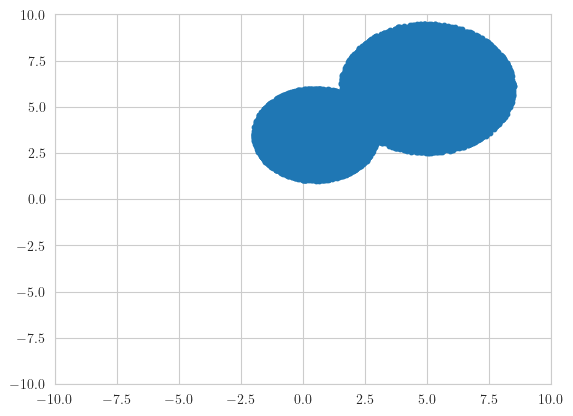

In [18]:
plt.scatter(data_samples[:, 0], data_samples[:, 1], s=10)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

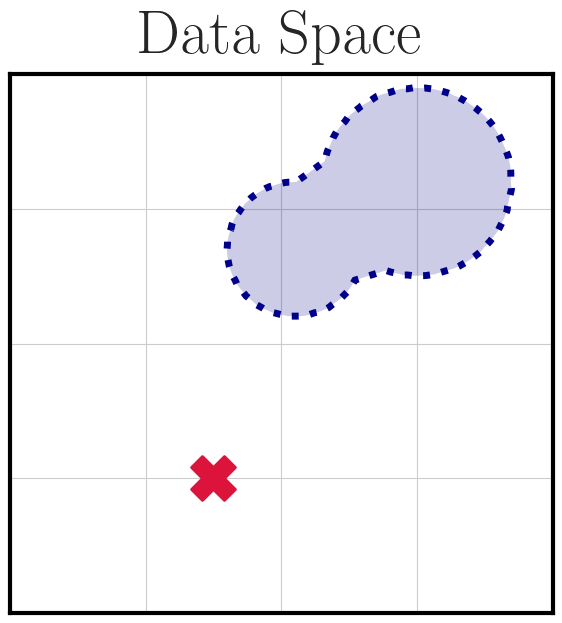

In [10]:
sns.set_style('whitegrid')

plt.rc('text', usetex=True)  # Enable LaTeX
plt.rc('font', family='serif')  # Use a serif font (e.g., Computer Modern)
plt.rcParams['text.latex.preamble'] = r'''
    \usepackage{amsmath}  % For \mathbb
    \usepackage{amssymb}  % For \mathbb
    \usepackage{bm}       % For bold math symbols
    \usepackage{underscore} % If underscores are needed
'''

plot_region_2D(
    region_points=data_samples,
    truth=np.array([-2.5, -5]),
    color='darkblue',
    alpha=1,  # using a lower-than-necessary alpha to have a single region
    parameter_space_bounds={r'$X_1$': {'low': -10, 'high': 10}, r'$X_2$': {'low': -10, 'high': 10}},
    labels=[r'$X_1$', r'$X_2$'],
    truth_color='crimson',
    truth_marker='X',
    linestyle=':',
    title='Data Space',
    figsize=(7, 7),
    save_fig_path='./outputs/dgp_data.pdf'
)

sns.set_style('white')

### Plot together

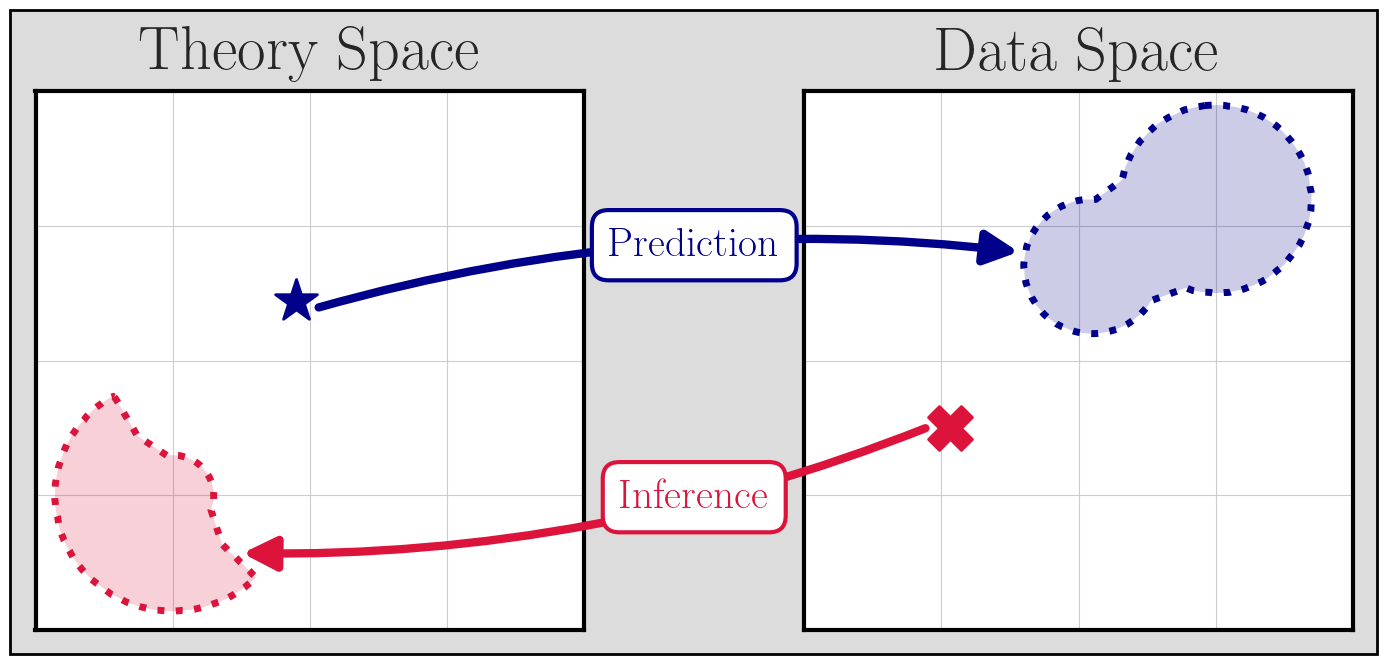

In [26]:
sns.set_style('whitegrid')

plt.rc('text', usetex=True)  # Enable LaTeX
plt.rc('font', family='serif')  # Use a serif font (e.g., Computer Modern)
plt.rcParams['text.latex.preamble'] = r'''
    \usepackage{amsmath}  % For \mathbb
    \usepackage{amssymb}  % For \mathbb
    \usepackage{bm}       % For bold math symbols
    \usepackage{underscore} % If underscores are needed
'''

fig, ax = plt.subplots(1, 2, figsize=(17, 7))
plt.subplots_adjust(wspace=0.4)

plot_region_2D(
    region_points=theta_samples,
    truth=np.array([-0.5, 2.2]),
    color='crimson',
    alpha=1,  # using a lower-than-necessary alpha to have a single region
    parameter_space_bounds={r'$\theta_1$': {'low': -10, 'high': 10}, r'$\theta_2$': {'low': -10, 'high': 10}},
    labels=[r'$\theta_1$', r'$\theta_2$'],
    truth_color='darkblue',
    truth_marker='*',
    linestyle=':',
    title='Theory Space',
    figsize=(7, 7),
    custom_ax=ax[0]
)
plot_region_2D(
    region_points=data_samples,
    truth=np.array([-4.7, -2.5]),
    color='darkblue',
    alpha=1,  # using a lower-than-necessary alpha to have a single region
    parameter_space_bounds={r'$X_1$': {'low': -10, 'high': 10}, r'$X_2$': {'low': -10, 'high': 10}},
    labels=[r'$X_1$', r'$X_2$'],
    truth_color='crimson',
    truth_marker='X',
    linestyle=':',
    title='Data Space',
    figsize=(7, 7),
    custom_ax=ax[1]
)
fig.text(0.5125, 0.66, "Prediction", fontsize=30, color='darkblue', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='darkblue', boxstyle='round,pad=0.4', linewidth=3), zorder=20)
fig.text(0.5125, 0.3, "Inference", fontsize=30, color='crimson', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='crimson', boxstyle='round,pad=0.4', linewidth=3), zorder=20)
arrow_prediction = FancyArrowPatch(
    posA=(0.29, 0.57), posB=(0.705, 0.65),
    connectionstyle="arc3,rad=-0.1", arrowstyle='-|>', mutation_scale=50, 
    color='darkblue', linewidth=6, zorder=10
)
arrow_inference = FancyArrowPatch(
    posA=(0.65, 0.4), posB=(0.245, 0.22),
    connectionstyle="arc3,rad=-0.1", arrowstyle='-|>', mutation_scale=50, 
    color='crimson', linewidth=6, zorder=10
)
fig.add_artist(arrow_prediction)
fig.add_artist(arrow_inference)
fig.patches.append(patches.Rectangle((0.11, 0.076), 0.804, 0.92, transform=fig.transFigure, edgecolor='black', linewidth=2, facecolor="gainsboro", zorder=-1))

plt.savefig('./outputs/dgp_full.pdf', bbox_inches='tight')
plt.show()

sns.set_style('white')

### SOME TEXT I NEED IN LATEX FONTS

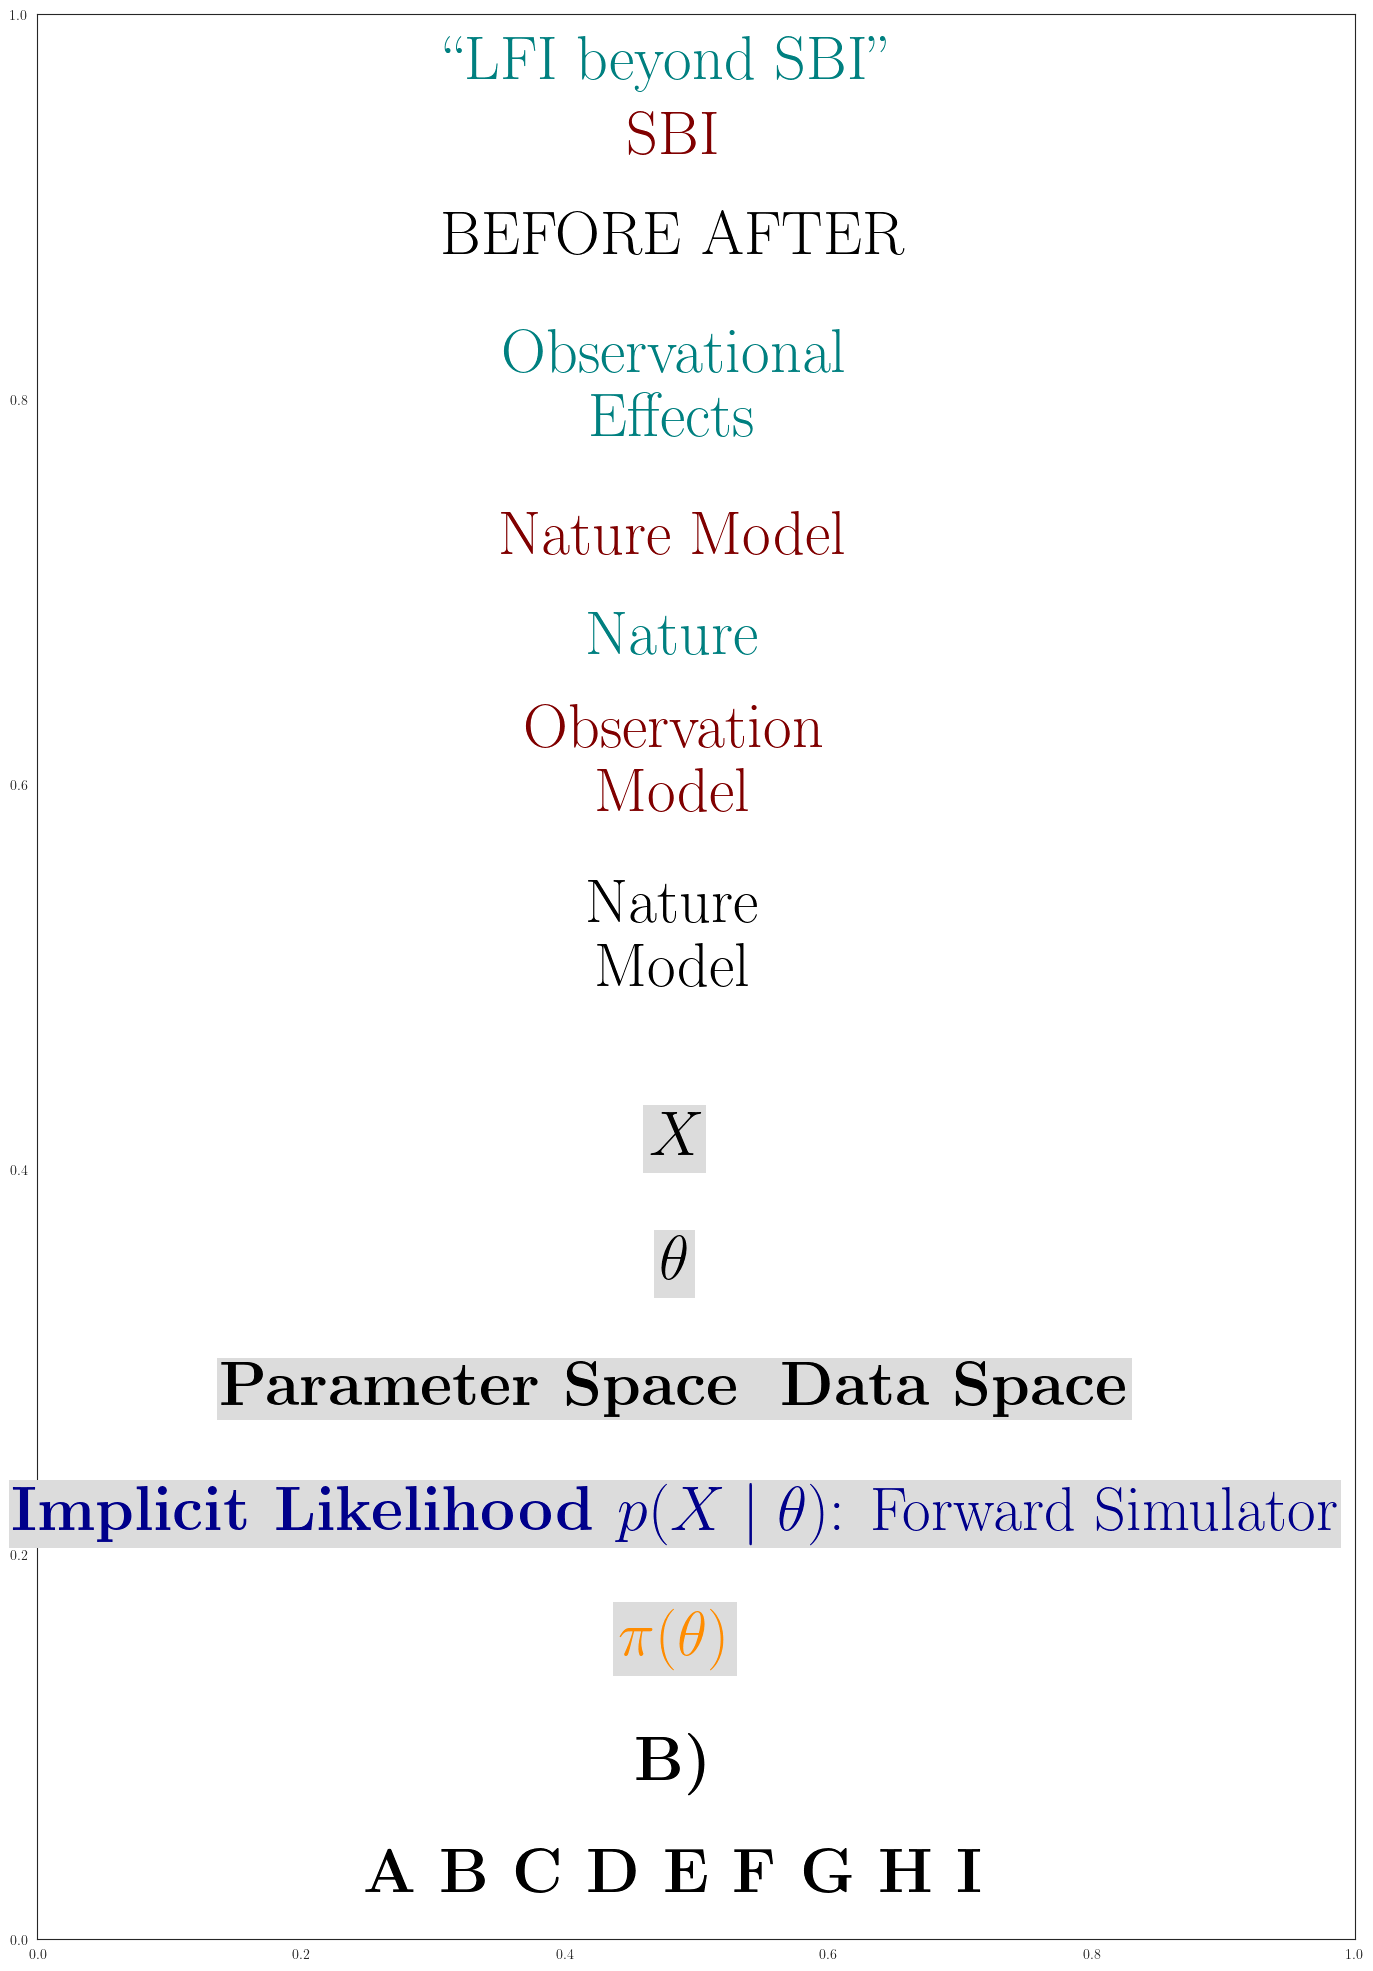

In [4]:
sns.set_style('white')

plt.rc('text', usetex=True)  # Enable LaTeX
plt.rc('font', family='serif')  # Use a serif font (e.g., Computer Modern)
plt.rcParams['text.latex.preamble'] = r'''
    \usepackage{amsmath}  % For \mathbb
    \usepackage{amssymb}  % For \mathbb
    \usepackage{bm}       % For bold math symbols
    \usepackage{underscore} % If underscores are needed
'''

fig, ax = plt.subplots(1, 1, figsize=(17, 25))
fig.text(0.5, 0.135, r'{\bf A B C D E F G H I}', fontsize=45, color='black', ha='center', va='center')
fig.text(0.5, 0.18, r'{\bf B)}', fontsize=45, color='black', ha='center', va='center')
fig.text(0.5, 0.23, r'$\pi(\theta)$', fontsize=45, color='darkorange', ha='center', va='center', bbox=dict(facecolor='gainsboro', edgecolor='none', boxstyle='square,pad=0.1'))
fig.text(0.5, 0.28, r'$\textbf{Implicit Likelihood }p(X \mid \theta)\text{: Forward Simulator}$', fontsize=45, color='darkblue', ha='center', va='center', bbox=dict(facecolor='gainsboro', edgecolor='none', boxstyle='square,pad=0.05'))
fig.text(0.5, 0.33, r'\textbf{Parameter Space } \textbf{Data Space}', fontsize=45, color='black', ha='center', va='center', bbox=dict(facecolor='gainsboro', edgecolor='none', boxstyle='square,pad=0.05'))
fig.text(0.5, 0.38, r'$\theta$', fontsize=45, color='black', ha='center', va='center', bbox=dict(facecolor='gainsboro', edgecolor='none', boxstyle='square,pad=0.1'))
fig.text(0.5, 0.43, r'$X$', fontsize=45, color='black', ha='center', va='center', bbox=dict(facecolor='gainsboro', edgecolor='none', boxstyle='square,pad=0.1'))
fig.text(0.5, 0.51, 'Nature\nModel', fontsize=45, color='black', ha='center', va='center')
fig.text(0.5, 0.58, 'Observation\nModel', fontsize=45, color='maroon', ha='center', va='center')
fig.text(0.5, 0.63, 'Nature', fontsize=45, color='teal', ha='center', va='center')
fig.text(0.5, 0.67, 'Nature Model', fontsize=45, color='maroon', ha='center', va='center')
fig.text(0.5, 0.73, 'Observational\nEffects', fontsize=45, color='teal', ha='center', va='center')
fig.text(0.5, 0.79, r'BEFORE AFTER', fontsize=45, color='black', ha='center', va='center')
fig.text(0.5, 0.83, 'SBI', fontsize=45, color='maroon', ha='center', va='center')
fig.text(0.5, 0.86, '“LFI beyond SBI”', fontsize=45, color='teal', ha='center', va='center')

plt.savefig('./outputs/dgp_text.pdf')
plt.show()